In [23]:
# x cada pacient (epoc chanel median) comarat amb TEIQue-SF

In [1]:
#IMPORTS

import matplotlib
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import scipy
import scipy.interpolate
import mne
import scipy
import statistics
from pywt import wavedec
from scipy import signal
import matplotlib.colors as mcolors
import random
import seaborn as sns
import os
from scipy import stats
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from Definicions import upperchanel
from Definicions import group_inf
from Definicions import mediumchanels
from Definicions import opteciogrups
from Definicions import find_nearest
from Definicions import grabt
from Definicions import bandpower
from Definicions import epoch_return
from Definicions import calcul
#from Definicions import collect

In [3]:
#Init. info.
#GROUPS
group1= ["FP2", "AFZ", "FZ", "FCZ", "CZ"]
group2= ["F7", "F5", "F3", "F1", "AF7", "AF3", "FP1"]
group3= ["FP2", "AF4", "AF8", "F2", "F4", "F6", "F8"]
group4= ["FT7", "T7", "TP7"]
group5= ["FC5", "FC3", "FC1", "C5", "C3", "C1"]
group6= ["CP5", "CP3", "CP1", "P7", "P5", "P3", "P1"]
group7= ["PO7", "PO3", "O1", "PO9"]
group8= ["PO4", "PO8", "O2", "PO10"]
group9= ["P2", "P4", "P6", "P8", "CP2", "CP4", "CP6"]
group10= ["FT8", "T8", "TP8"]
group11= ["CPZ", "PZ", "POZ", "OZ", "IZ"]
group12= ["FC2", "FC4", "FC6", "C2", "C4", "C6"]

#X
groups = [group1, group2, group3, group4, group5, group6, group7, group8, group9, group10, group11, group12]

#General aspects
titlegrup = ["ch1","ch2","ch3","ch4","ch5","ch6","ch7","ch8","ch9","ch10","ch11","ch12"]
ct_ty = ["eeg", "eeg", "eeg", "eeg", "eeg", "eeg", "eeg", "eeg", "eeg", "eeg", "eeg", "eeg"]
sfreq = 250
info = mne.create_info(ch_names=titlegrup, sfreq=sfreq, ch_types=ct_ty)

In [4]:
#Load
basePATH = 'Files/Preprocessed/'
listPATHEC = []
listPATHEO = []

for root, dirs, files in os.walk("Files/Preprocessed/"):
    for filename in files:
        if '.set' in filename:
            if 'EC' in filename:
                listPATHEC.append(filename)
            if 'EO' in filename:
                listPATHEO.append(filename)

sorted_list_EO = sorted(listPATHEO)
sorted_list_EC = sorted(listPATHEC)


In [5]:
sorted_list_EO

['sub-010002_EO.set',
 'sub-010003_EO.set',
 'sub-010004_EO.set',
 'sub-010005_EO.set',
 'sub-010006_EO.set',
 'sub-010007_EO.set',
 'sub-010010_EO.set',
 'sub-010012_EO.set',
 'sub-010016_EO.set',
 'sub-010017_EO.set',
 'sub-010019_EO.set',
 'sub-010020_EO.set',
 'sub-010021_EO.set',
 'sub-010022_EO.set',
 'sub-010023_EO.set',
 'sub-010024_EO.set',
 'sub-010026_EO.set',
 'sub-010027_EO.set',
 'sub-010028_EO.set']

In [6]:
sorted_list_EC

['sub-010002_EC.set',
 'sub-010003_EC.set',
 'sub-010004_EC.set',
 'sub-010005_EC.set',
 'sub-010006_EC.set',
 'sub-010007_EC.set',
 'sub-010010_EC.set',
 'sub-010012_EC.set',
 'sub-010016_EC.set',
 'sub-010017_EC.set',
 'sub-010019_EC.set',
 'sub-010020_EC.set',
 'sub-010021_EC.set',
 'sub-010022_EC.set',
 'sub-010023_EC.set',
 'sub-010024_EC.set',
 'sub-010026_EC.set',
 'sub-010027_EC.set',
 'sub-010028_EC.set']

In [7]:
EO_EC_Pacients = []

for i in sorted_list_EO:
    #LOAD
    x=mne.io.read_raw_eeglab(basePATH+i, preload=True, verbose=True)
    #GET DATA
    data = x._data
    #GET CHANELS
    chanles_names = x.ch_names
    #REDUCE CHANELS TO 12
    EO = opteciogrups(chanles_names, groups, data)

    #Select the same but with EC
    EC_name = [sorted_list_EC.index(e) for e in sorted_list_EC if i[:-6] in e]
    EC_name_PATH = sorted_list_EC[EC_name[0]]
    #LOAD
    x2=mne.io.read_raw_eeglab(basePATH+EC_name_PATH, preload=True, verbose=True)
    #GET DATA
    data2 = x2._data
    #GET CHANELS
    chanles_names2 = x2.ch_names
    #REDUCE CHANELS TO 12
    EC = opteciogrups(chanles_names2, groups, data2)

    #save
    EO_EC_P = []
    EO_EC_P.append(EO)
    EO_EC_P.append(EC)
    EO_EC_Pacients.append(EO_EC_P)

Reading Files/Preprocessed/sub-010002_EO.fdt
Reading 0 ... 117860  =      0.000 ...   471.440 secs...
Reading Files/Preprocessed/sub-010002_EC.fdt
Reading 0 ... 119344  =      0.000 ...   477.376 secs...
Reading Files/Preprocessed/sub-010003_EO.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...
Reading Files/Preprocessed/sub-010003_EC.fdt
Reading 0 ... 119515  =      0.000 ...   478.060 secs...
Reading Files/Preprocessed/sub-010004_EO.fdt
Reading 0 ... 119748  =      0.000 ...   478.992 secs...
Reading Files/Preprocessed/sub-010004_EC.fdt
Reading 0 ... 119277  =      0.000 ...   477.108 secs...
Reading Files/Preprocessed/sub-010005_EO.fdt
Reading 0 ... 119821  =      0.000 ...   479.284 secs...
Reading Files/Preprocessed/sub-010005_EC.fdt
Reading 0 ... 119999  =      0.000 ...   479.996 secs...
Reading Files/Preprocessed/sub-010006_EO.fdt
Reading 0 ... 110270  =      0.000 ...   441.080 secs...
Reading Files/Preprocessed/sub-010006_EC.fdt
Reading 0 ... 116011  =      0.000 ..

In [8]:
'''for pacient in EO_EC_Pacients:
    for data in pacient:
        matplotlib.pyplot.psd(data[1])
        plt.show()'''

'for pacient in EO_EC_Pacients:\n    for data in pacient:\n        matplotlib.pyplot.psd(data[1])\n        plt.show()'

In [9]:
'''#realitve general
pacie_beta = []

for pacient in EO_EC_Pacients:
    f_beta = bandpower(pacient[0][1], 250, [13, 32],relative=True)
    pacie_beta.append(f_beta)
    print(f_beta)
    #gamma
    f_gama = bandpower(pacient[0][1], 250, [32, 100],relative=True)
    print(f_gama)
    #alpha
    f_alpha = bandpower(pacient[0][1], 250, [9, 13],relative=True)
    print(f_alpha)
    #theta
    f_theta = bandpower(pacient[0][1], 250, [4, 8],relative=True)
    print(f_theta)
    #delta
    f_delta = bandpower(pacient[0][1], 250, [0.1, 4],relative=True)
    print(f_delta)
    print('-')
    print('-')'''


"#realitve general\npacie_beta = []\n\nfor pacient in EO_EC_Pacients:\n    f_beta = bandpower(pacient[0][1], 250, [13, 32],relative=True)\n    pacie_beta.append(f_beta)\n    print(f_beta)\n    #gamma\n    f_gama = bandpower(pacient[0][1], 250, [32, 100],relative=True)\n    print(f_gama)\n    #alpha\n    f_alpha = bandpower(pacient[0][1], 250, [9, 13],relative=True)\n    print(f_alpha)\n    #theta\n    f_theta = bandpower(pacient[0][1], 250, [4, 8],relative=True)\n    print(f_theta)\n    #delta\n    f_delta = bandpower(pacient[0][1], 250, [0.1, 4],relative=True)\n    print(f_delta)\n    print('-')\n    print('-')"

In [10]:

#Relative for EO

#Subject = EO_EC_Pacients[S] max=15
#EO = EO_EC_Pacients[S][0]
#EC = EO_EC_Pacients[S][1]
#Channel = EO_EC_Pacients[0][1][Num] max=12
pacient_beta_EO = []

pacient_alpha_EO = []

pacient_gama_EO = []

pacient_theta_EO = []

pacient_delta_EO = []

for pacient in EO_EC_Pacients:
    EO_Epochs = epoch_return(pacient[0])
    chanels_betta = []
    chanels_gama = []
    chanels_alpha = []
    chanels_theta = []
    chanels_delta = []
    for chane in EO_Epochs:
        for epoch in chane:
            f_beta = bandpower(epoch, 250,[30, 250], window_sec=5, relative=True)
            chanels_betta.append(f_beta)
            #gamma
            f_gama = bandpower(epoch, 250, [32, 100], window_sec=5, relative=True)
            chanels_gama.append(f_gama)
            #alpha
            f_alpha = bandpower(epoch, 250, [9, 13], window_sec=5, relative=True)
            chanels_alpha.append(f_alpha)
            #theta
            f_theta = bandpower(epoch, 250, [4, 8], window_sec=5, relative=True)
            chanels_theta.append(f_theta)
            #delta
            f_delta = bandpower(epoch, 250, [0.1, 4], window_sec=5, relative=True)
            chanels_delta.append(f_delta)
            
    #for chanels

    mean_x = statistics.median(chanels_betta)
    pacient_beta_EO.append(mean_x)

    mean_x = statistics.median(chanels_gama)
    pacient_alpha_EO.append(mean_x)

    mean_x = statistics.median(chanels_alpha)
    pacient_gama_EO.append(mean_x)

    mean_x = statistics.median(chanels_theta)
    pacient_theta_EO.append(mean_x)

    mean_x = statistics.median(chanels_delta)
    pacient_delta_EO.append(mean_x)





In [11]:
pacient_beta_EC = []

pacient_alpha_EC = []

pacient_gama_EC = []

pacient_theta_EC = []

pacient_delta_EC = []

for pacient in EO_EC_Pacients:
    chanels_betta = []
    chanels_gama = []
    chanels_alpha = []
    chanels_theta = []
    chanels_delta = []
    EC_Epochs = epoch_return(pacient[1])
    for chane in EC_Epochs:
        for epoch in chane:
            f_beta = bandpower(epoch, 250, [13, 32], window_sec=5, relative=True)
            chanels_betta.append(f_beta)
            #gamma
            f_gama = bandpower(epoch, 250, [32, 100], window_sec=5, relative=True)
            chanels_gama.append(f_gama)
            #alpha
            f_alpha = bandpower(epoch, 250, [9, 13], window_sec=5, relative=True)
            chanels_alpha.append(f_alpha)
            #theta
            f_theta = bandpower(epoch, 250, [4, 8], window_sec=5, relative=True)
            chanels_theta.append(f_theta)
            #delta
            f_delta = bandpower(epoch, 250, [0.1, 4], window_sec=5, relative=True)
            chanels_delta.append(f_delta)


    mean_x = statistics.median(chanels_betta)
    pacient_beta_EC.append(mean_x)

    mean_x = statistics.median(chanels_gama)
    pacient_alpha_EC.append(mean_x)

    mean_x = statistics.median(chanels_alpha)
    pacient_gama_EC.append(mean_x)

    mean_x = statistics.median(chanels_theta)
    pacient_theta_EC.append(mean_x)

    mean_x = statistics.median(chanels_delta)
    pacient_delta_EC.append(mean_x)

In [12]:
import csv

# open the file in universal line ending mode 
with open('Files/TEIQue-SF.csv', 'rU') as infile:
  # read the file as a dictionary for each row ({header : value})
  reader = csv.DictReader(infile)
  data = {}
  for row in reader:
    for header, value in row.items():
      try:
        data[header].append(value)
      except KeyError:
        data[header] = [value]

# extract the variables you want
names = data['ID']
TeiQueSF_emotionality = data['TeiQueSF_emotionality']
TeiQueSF_well_being = data['TeiQueSF_well_being']

BETTA

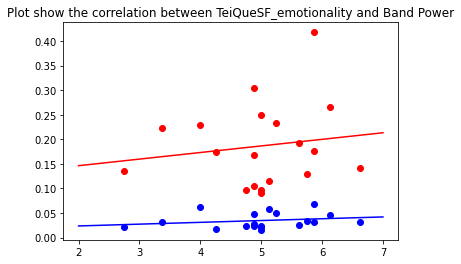

In [13]:
calcul(names, sorted_list_EO, sorted_list_EC, TeiQueSF_emotionality, pacient_beta_EO, pacient_beta_EC, 2, 7)

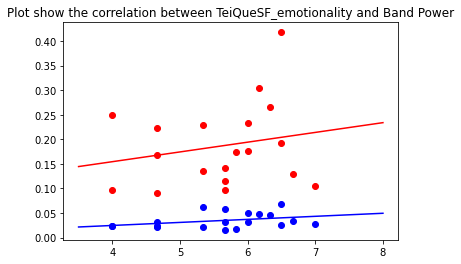

In [14]:
calcul(names, sorted_list_EO, sorted_list_EC, TeiQueSF_well_being, pacient_beta_EO, pacient_beta_EC, 3.5, 8)

GAMA

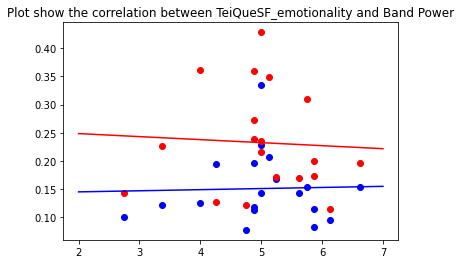

In [15]:
calcul(names, sorted_list_EO, sorted_list_EC, TeiQueSF_emotionality, pacient_gama_EO, pacient_gama_EC,2, 7)


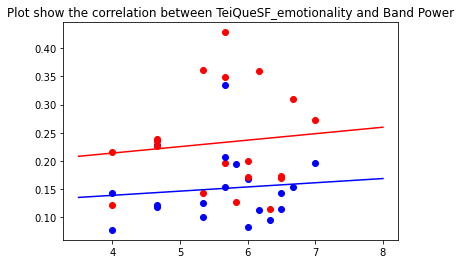

In [16]:
calcul(names, sorted_list_EO, sorted_list_EC, TeiQueSF_well_being, pacient_gama_EO, pacient_gama_EC, 3.5, 8)

alpha

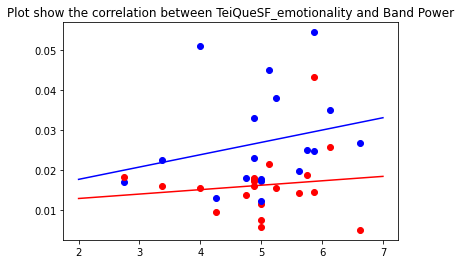

In [17]:
calcul(names, sorted_list_EO, sorted_list_EC, TeiQueSF_emotionality, pacient_alpha_EO, pacient_alpha_EC,2, 7)

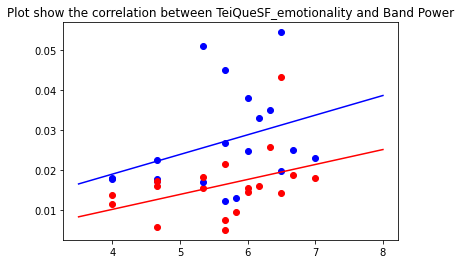

In [18]:
calcul(names, sorted_list_EO, sorted_list_EC, TeiQueSF_well_being, pacient_alpha_EO, pacient_alpha_EC, 3.5, 8)

theta

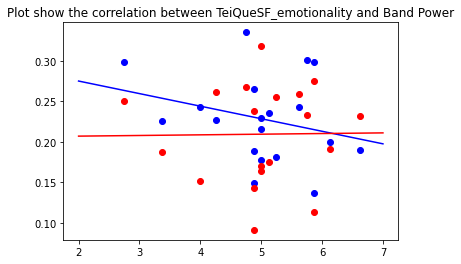

In [19]:
calcul(names, sorted_list_EO, sorted_list_EC, TeiQueSF_emotionality, pacient_theta_EO, pacient_theta_EC,2, 7)

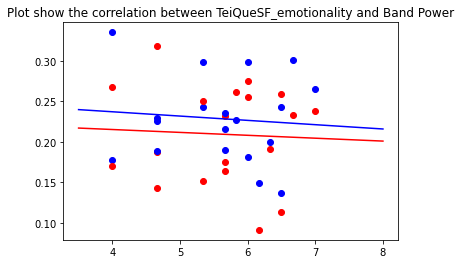

In [20]:
calcul(names, sorted_list_EO, sorted_list_EC, TeiQueSF_well_being, pacient_theta_EO, pacient_theta_EC, 3.5, 8)

delta

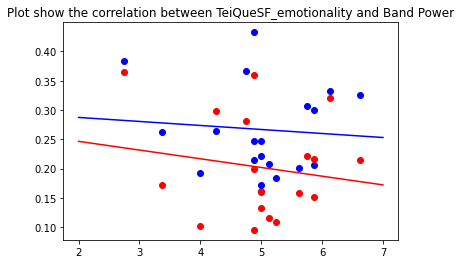

In [21]:
calcul(names, sorted_list_EO, sorted_list_EC, TeiQueSF_emotionality, pacient_delta_EO, pacient_delta_EC,2, 7)

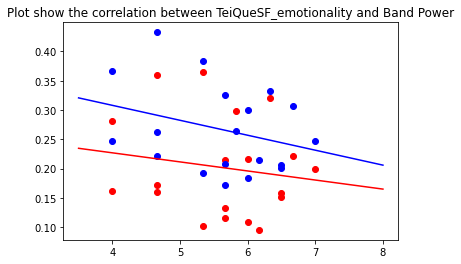

In [22]:
calcul(names, sorted_list_EO, sorted_list_EC, TeiQueSF_well_being, pacient_delta_EO, pacient_delta_EC, 3.5, 8)

In [24]:
pacient_beta_EO

[0.0690921694081626,
 0.021439986465861573,
 0.024570878920336083,
 0.031313824240928476,
 0.049479680817913894,
 0.06245138560830911,
 0.03102965838903727,
 0.04793657420981892,
 0.04652732238161325,
 0.02278093053839783,
 0.03113395811452213,
 0.02824985850654311,
 0.0242402673473694,
 0.021780391501109372,
 0.01655460703139881,
 0.015535824630529832,
 0.05779655632227847,
 0.022979047946448027,
 0.032896548176968785]